# Lab | Text Generation from Shakespeare's Sonnet

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 
import requests

In [19]:
tokenizer = Tokenizer()

# Download Shakespeare's Sonnets (Folger version as fallback)

url = "https://flgr.sh/txtfssSontxt?_ga=2.57787626.1183684734.1757944513-1000077299.1757944513"
response = requests.get(url)
data = response.text

corpus = data.lower().split("\n")

print("Number of lines in corpus:", len(corpus))
print("First 5 lines:")
for line in corpus[:5]:
    print(repr(line))


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Number of lines in corpus: 2676
First 5 lines:
'sonnets\r'
'by william shakespeare\r'
'edited by barbara a. mowat and paul werstine\r'
'  with michael poston and rebecca niles\r'
'folger shakespeare library\r'


In [21]:
print("Total unique words:", total_words)

Total unique words: 3672


In [23]:
line_lengths = [len(line.split()) for line in corpus]
print("Shortest line length:", min(line_lengths))
print("Longest line length:", max(line_lengths))

Shortest line length: 0
Longest line length: 12


In [24]:

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True))) #(# An LSTM Layer)
model.add(Dropout(0.2)) #(# A dropout layer)
model.add(LSTM(100)) #(# Another LSTM Layer)
model.add(Dense(total_words//2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #(# Pick a loss function and an optimizer)
print(model.summary())


C:\Users\Amin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6413 - loss: 1.9127
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6569 - loss: 1.8748
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6638 - loss: 1.8354
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.6633 - loss: 1.8262
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6704 - loss: 1.8062
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.6797 - loss: 1.7724
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6832 - loss: 1.7428
Epoch 8/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6838 - loss: 1.7234
Epoch 9/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6931 - loss: 1.7096
Epoch 10/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6973 - loss: 1.6787
Epoch 11/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.7069 - loss: 1.6513
Epoch 12/100
544/54

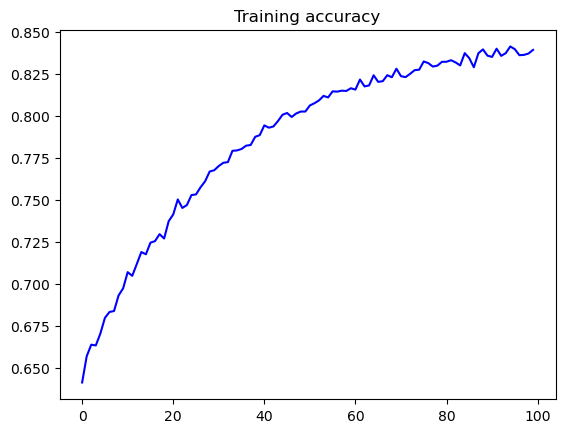

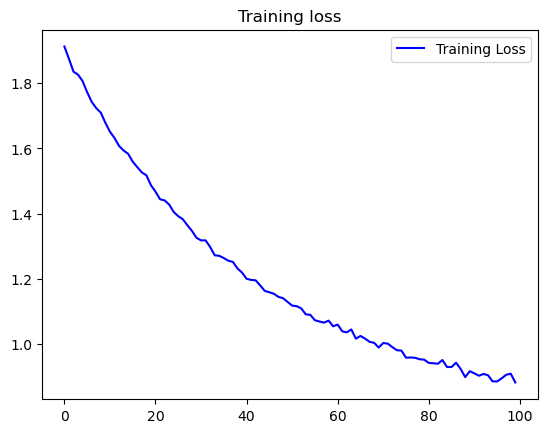

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [29]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

 time death woe ill ill ill of woe woe hope most hope take take time glass faults sun most hope time praise lovely time hope sun sun best first most hope shame compounds curse steel shame death hope time most best mine time slave take time take time hope praise first most hope time hope time death most best tears lovely lines curse time hope time take time glass eye glass fresh most hope time fear fear take slave take grace eye steel most praise tears
